In [1]:
import pandas as pd
import sys

sys.path.append('../../')
from src.transform import load_json,transform_diff_avg,transform_diff_experiments
from src.plot_helpers import plot_experiment_range,plot_correlation_matrix,plot_boxplot

indoors_cols = load_json("../../json/locations.json")["wings_indoors"]

In [2]:
df = pd.read_csv('../../data/clean_data/all_sensors.csv',index_col=0,parse_dates=True)
df_air_indoor = pd.read_csv('../../data/clean_data/airwings.csv',index_col=0,parse_dates=True)

df_air_indoor = df_air_indoor.loc[(df_air_indoor['sensor'] == 'air_wings_indoor') | (df_air_indoor['sensor'] == 'air_wings_indoor_ref'), indoors_cols]

df_air_indoor.rename(columns={'device_id': 'sensor'}, inplace=True)
df_air_indoor['sensor'] = 'AWI_indoor_' + df_air_indoor['sensor'].astype(str)

df_air_indoor

/tmp/ipykernel_1936789/3833256816.py:1: DtypeWarning: Columns (6,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/clean_data/all_sensors.csv',index_col=0,parse_dates=True)


co2     tvoc   co  pm_1.0  pm_2.5  pm_10  \
datetime                                                            
2024-10-16 05:00:43   657.32     0.00  0.5    2.15    2.27   2.24   
2024-10-16 05:01:43   657.32     0.00  0.5    2.15    2.25   2.23   
2024-10-16 05:02:43   657.31     0.00  0.5    2.13    2.24   2.22   
2024-10-16 05:03:43   657.31     0.00  0.5    2.05    2.15   2.13   
2024-10-16 05:04:43   657.31     0.00  0.5    2.00    2.11   2.09   
...                      ...      ...  ...     ...     ...    ...   
2024-10-20 23:36:15  1053.40  1217.67  0.5   36.02   38.17  38.26   
2024-10-20 23:41:15  1054.87  1224.10  0.5   36.10   38.21  38.25   
2024-10-20 23:46:16  1055.30  1226.17  0.5   36.24   38.34  38.35   
2024-10-20 23:51:16  1056.97  1233.67  0.5   36.84   38.96  38.97   
2024-10-20 23:56:17  1060.37  1248.20  0.5   36.93   39.16  39.30   

                     temperature  humidity  pressure            sensor  
datetime                                                                
2024-10-16 05:00:43        26.60      33.0   1010.26    AWI_indoor_2.0  
2024-10-16 05:01:43        26.60      33.0   1010.28    AWI_indoor_2.0  
2024-10-16 05:02:43        26.60      33.0   1010.30    AWI_indoor_2.0  
2024-10-16 05:03:43        26.59      33.0   1010.30    AWI_indoor_2.0  
2024-10-16 05:04:43        26.59      33.0   1010.31    AWI_indoor_2.0  
...                          ...       ...       ...               ...  
2024-10-20 23:36:15        26.49      41.0   1017.03  AWI_indoor_316.0  
2024-10-20 23:41:15        26.49      41.0   1017.02  AWI_indoor_316.0  
2024-10-20 23:46:16        26.48      41.0   1017.05  AWI_indoor_316.0  
2024-10-20 23:51:16        26.46      41.0   1016.99  AWI_indoor_316.0  
2024-10-20 23:56:17        26.45      41.0   1017.04  AWI_indoor_316.0  

[81753 rows x 10 columns]

In [3]:
pm_10_full = pd.concat([df_air_indoor[["pm_10","sensor"]],df[["pm_10","sensor"]]],axis=0)
pm_10_full


pm_10          sensor
datetime                                  
2024-10-16 05:00:43   2.24  AWI_indoor_2.0
2024-10-16 05:01:43   2.23  AWI_indoor_2.0
2024-10-16 05:02:43   2.22  AWI_indoor_2.0
2024-10-16 05:03:43   2.13  AWI_indoor_2.0
2024-10-16 05:04:43   2.09  AWI_indoor_2.0
...                    ...             ...
2024-10-23 13:31:00  40.28      ref_sensor
2024-10-23 13:32:00  43.45      ref_sensor
2024-10-23 13:33:00  41.73      ref_sensor
2024-10-23 13:34:00  43.22      ref_sensor
2024-10-23 13:35:00  40.63      ref_sensor

[660362 rows x 2 columns]

In [4]:
pivot_full = pd.DataFrame()

for col in pm_10_full["sensor"].unique():
    
    pivot_full = pd.concat([pivot_full,pm_10_full.loc[pm_10_full['sensor'] == col].pivot_table(index='datetime', columns='sensor', values='pm_10')],axis=1)

pivot_full.resample('240s').mean()['2024-10-16 05:00:43':'2024-10-20 23:56:17']

sensor               AWI_indoor_2.0  AWI_indoor_3.0  AWI_indoor_4.0  \
datetime                                                              
2024-10-16 05:04:00          2.1175            6.61         56.1275   
2024-10-16 05:08:00          2.2625            6.61         55.4800   
2024-10-16 05:12:00          2.2750            6.61         54.5825   
2024-10-16 05:16:00          2.2775            6.61         53.3025   
2024-10-16 05:20:00          2.1675            6.61         53.7400   
...                             ...             ...             ...   
2024-10-20 23:40:00          8.5575            6.61         39.3350   
2024-10-20 23:44:00          8.7250            6.61         39.2050   
2024-10-20 23:48:00          8.4800            6.61         39.6375   
2024-10-20 23:52:00          8.4650            6.61         40.0375   
2024-10-20 23:56:00          8.5950            6.61         39.6900   

sensor               AWI_indoor_5.0  AWI_indoor_6.0  AWI_indoor_7.0  \
datetime                                                              
2024-10-16 05:04:00       50.830000         51.6925         59.7750   
2024-10-16 05:08:00       51.002500         52.1375         57.3450   
2024-10-16 05:12:00       51.073333         51.6250         57.7350   
2024-10-16 05:16:00       50.485000         51.5400         57.5225   
2024-10-16 05:20:00       51.000000         50.9425         57.5425   
...                             ...             ...             ...   
2024-10-20 23:40:00       36.852500         37.9150         41.5125   
2024-10-20 23:44:00       37.080000         38.1450         41.7975   
2024-10-20 23:48:00       36.737500         38.1225         41.9150   
2024-10-20 23:52:00       36.812500         38.2725         42.4950   
2024-10-20 23:56:00       37.092500         38.1250         42.7150   

sensor               AWI_indoor_8.0  AWI_indoor_9.0  AWI_indoor_10.0  \
datetime                                                               
2024-10-16 05:04:00         49.8400         51.1600          56.0225   
2024-10-16 05:08:00         49.2375         50.9300          56.1225   
2024-10-16 05:12:00         49.7150         49.9775          54.4925   
2024-10-16 05:16:00         49.8450         50.3150          55.1050   
2024-10-16 05:20:00         49.8825         49.8125          55.0800   
...                             ...             ...              ...   
2024-10-20 23:40:00         37.2000         36.2725          39.6800   
2024-10-20 23:44:00         36.5725         36.9250          39.5950   
2024-10-20 23:48:00         36.9075         37.3050          39.4150   
2024-10-20 23:52:00         36.5950         37.4175          40.3500   
2024-10-20 23:56:00         37.6600         37.4800          40.1350   

sensor               AWI_indoor_11.0  ...  AWI_indoor_13.0  AWI_indoor_14.0  \
datetime                              ...                                     
2024-10-16 05:04:00          51.0500  ...          50.7925          47.7275   
2024-10-16 05:08:00          51.4200  ...          50.6150          47.5700   
2024-10-16 05:12:00          50.8725  ...          50.7175          47.3125   
2024-10-16 05:16:00          50.8200  ...          50.3500          47.8625   
2024-10-16 05:20:00          50.4775  ...          50.8050          47.0100   
...                              ...  ...              ...              ...   
2024-10-20 23:40:00          37.0100  ...          37.6075          34.9825   
2024-10-20 23:44:00          37.5725  ...          37.4675          35.2350   
2024-10-20 23:48:00          37.2600  ...          37.6375          35.2250   
2024-10-20 23:52:00          37.4000  ...          37.9150          35.4975   
2024-10-20 23:56:00          36.9675  ...          38.3025          35.6250   

sensor               AWI_indoor_15.0  AWI_indoor_316.0  inbiot  kaiterra  \
datetime                                                                   
2024-10-16 05:04:00          54.775

## Correlation matrix

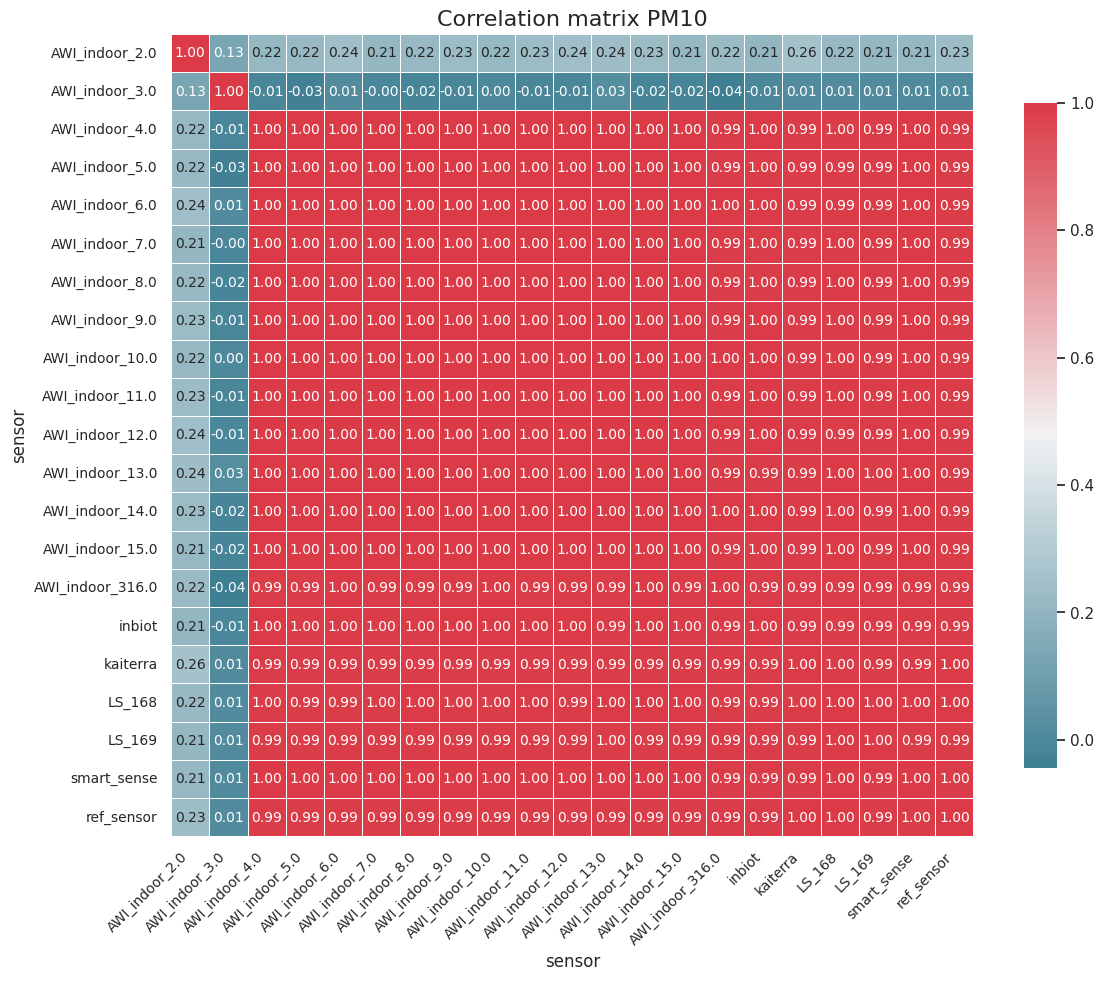

In [5]:
plot_correlation_matrix(pivot_full.resample('240s').mean()['2024-10-16 05:00:43':'2024-10-20 23:56:17'].corr(),"Correlation matrix PM10")

## Box plots

In [6]:
plot_boxplot(pivot_full.resample('240s').mean()['2024-10-16 05:00:43':'2024-10-20 23:56:17'],col_names=['AWI_indoor_2.0','AWI_indoor_15.0','AWI_indoor_316.0','inbiot','LS_168','LS_169','smart_sense','ref_sensor'])

## Time series plot

In [7]:
plot_experiment_range(pivot_full.resample('240s').mean()['2024-10-16 05:00:43':'2024-10-20 23:56:17'],col_names=['AWI_indoor_316.0','inbiot','kaiterra','LS_168','LS_169','smart_sense','ref_sensor'])

In [8]:
diff_df = transform_diff_avg(pivot_full.resample('240s').mean())
diff_df

/home/usr1_tt/collocation_study/notebooks/all_sensors/../../src/transform.py:16: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



Doors opened   Hall opened  Indoor Room Air Exchange  \
sensor                                                                   
AWI_indoor_2.0    8.731349e+00 -7.162857e-01                  0.182417   
AWI_indoor_3.0    1.387779e-15  2.775558e-15                  0.000000   
AWI_indoor_4.0   -1.773844e+01 -3.587274e+00                -11.823785   
AWI_indoor_5.0   -1.580254e+01 -2.310995e+00                -13.115670   
AWI_indoor_6.0   -1.848699e+01 -3.200409e+00                -11.841968   
AWI_indoor_7.0   -1.837749e+01 -3.526584e+00                -12.246285   
AWI_indoor_8.0   -1.559998e+01 -3.289158e+00                -11.521953   
AWI_indoor_9.0   -1.986057e+01 -3.211463e+00                -11.359897   
AWI_indoor_10.0  -1.812251e+01 -3.255605e+00                -11.440867   
AWI_indoor_11.0  -1.907699e+01 -3.364184e+00                -12.088670   
AWI_indoor_12.0  -1.724286e+01 -3.273154e+00                -10.877815   
AWI_indoor_13.0  -1.742062e+01 -3.262144e+00                -11.975982   
AWI_indoor_14.0  -1.600445e+01 -1.795901e+00                -11.132204   
AWI_indoor_15.0  -1.789775e+01 -2.269990e+00                -10.857357   
AWI_indoor_316.0 -1.295281e+01 -2.605502e+00                 -8.449837   
inbiot           -1.334172e+01 -3.125000e+00                -10.204868   
kaiterra         -1.458995e+01 -3.463521e+00                 -9.694464   
LS_168           -1.638593e+01 -3.223474e+00                 -9.704631   
LS_169           -1.610889e+01 -3.250834e+00                -10.038319   
smart_sense      -1.493484e+01 -3.183136e+00                -10.896085   
ref_sensor       -1.420317e+01 -3.729229e+00                 -7.729586   

                  Rowing CD  Rowing OD  Human Presence  Diffuser (Water)  \
sensor                                                                     
AWI_indoor_2.0    -0.471635   0.687736   -3.179603e-01      4.866274e-01   
AWI_indoor_3.0     0.000000   0.000000    2.523234e-15      2.775558e-15   
AWI_indoor_4.0     0.390857 -20.539682   -1.438049e+00      9.171938e+00   
AWI_indoor_5.0    -0.718308 -20.766958   -1.022936e+00      1.102434e+01   
AWI_indoor_6.0     0.000000 -29.006977   -9.949167e-01      1.058480e+01   
AWI_indoor_7.0     0.170987 -31.254905   -1.293048e+00      1.168038e+01   
AWI_indoor_8.0     1.414668 -30.318597   -1.346275e+00      1.170372e+01   
AWI_indoor_9.0    -0.572055 -30.051029   -1.233087e+00      9.208222e+00   
AWI_indoor_10.0   -0.466836 -19.321266   -1.144514e+00      9.347501e+00   
AWI_indoor_11.0   -0.803681 -20.840584   -9.734729e-01      1.341762e+01   
AWI_indoor_12.0   -0.043725 -29.544029   -7.883289e-01      9.556064e+00   
AWI_indoor_13.0   -0.565324 -25.668053   -5.410625e-01      1.653881e+01   
AWI_indoor_14.0    0.000000 -29.534727   -9.235544e-01      1.177243e+01   
AWI_indoor_15.0   -0.346112 -30.533844   -1.070310e+00      1.114265e+01   
AWI_indoor_316.0  -1.046443  -0.230548   -7.636989e-01      1.461026e+01   
inbiot             0.390625 -20.084746   -8.736694e-01      1.277778e+01   
kaiterra          -2.463997 -29.155771   -1.552791e+00      1.920102e+01   
LS_168            -1.005176 -31.176166   -1.311942e+00      2.209412e+01   
LS_169            -0.861383 -31.239790   -1.009055e+00      2.757166e+01   
smart_sense       -0.261596 -30.884620   -1.874732e+00      1.450522e+01   
ref_sensor        -1.219188 -23.682043    7.627521e-02      1.841121e+01   

                  Diffuser (Oil)      Car (3m)   Car (5m)  Gas Burner (CD)  \
sensor                                                                       
AWI_indoor_2.0     -9.359643e-01  1.436154e+00  -2.932162        -0.149888   
AWI_indoor_3.0      2.775558e-15  2.220446e-14   0.000000         0.000000   
AWI_indoor_4.0      5.088329e+00 -3.455977e+01 -14.061295         0.077049   
AWI_indoor_5.0      1.307324e+01 -3.112870e+01 -16.571200         0.749745   
AWI_indoor_6.0      1.433220e+01 -3.188642e+01 -17.105971        -0.133593   
AWI_indoor_7.0      

### Correlation matrix for diff DataFrame

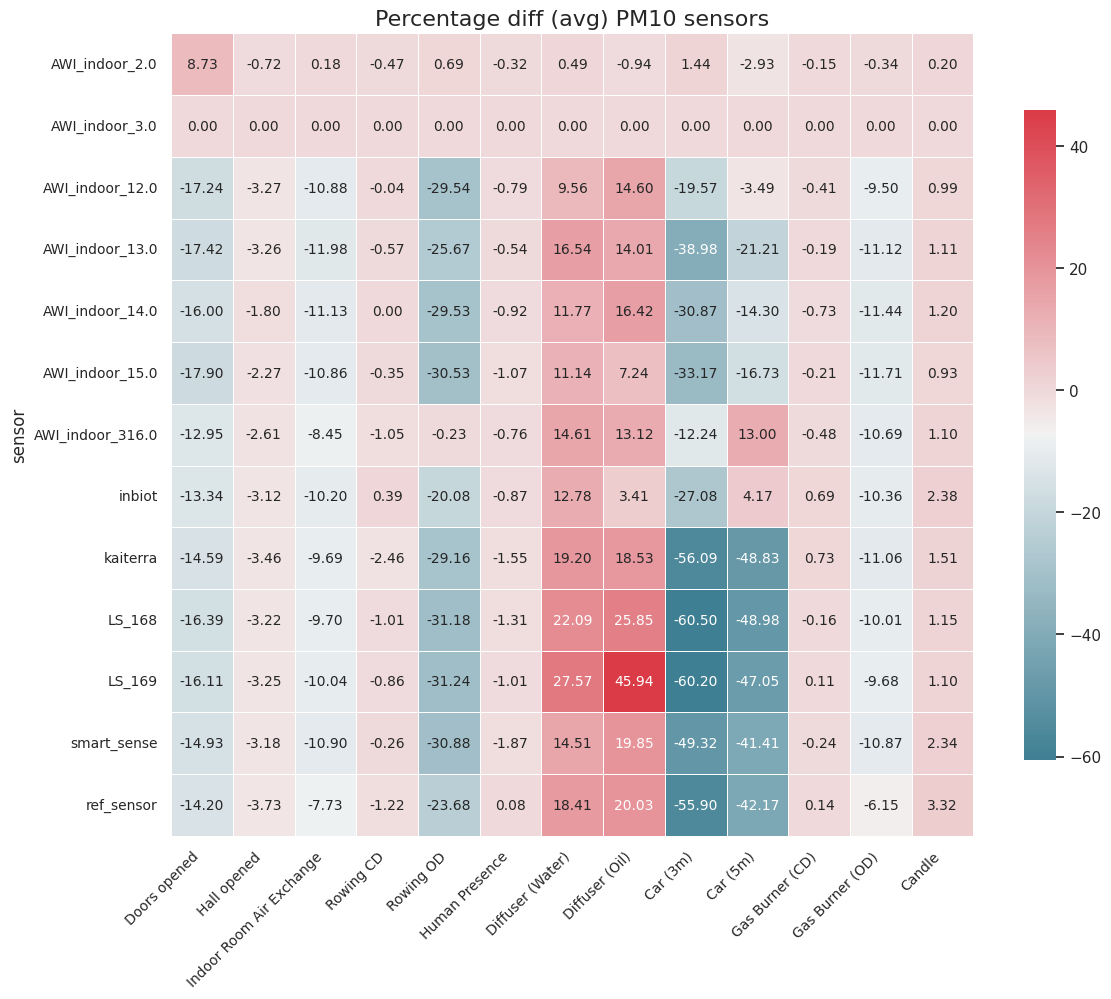

In [9]:
plot_correlation_matrix(diff_df.drop(['AWI_indoor_4.0','AWI_indoor_5.0','AWI_indoor_6.0','AWI_indoor_7.0','AWI_indoor_8.0','AWI_indoor_9.0','AWI_indoor_10.0','AWI_indoor_11.0']),title="Percentage diff (avg) PM10 sensors")

###

In [12]:
df_diff_exp_data = transform_diff_experiments(pivot_full.resample('240s').mean())
df_diff_exp_data

/home/usr1_tt/collocation_study/notebooks/all_sensors/../../src/transform.py:37: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



sensor               AWI_indoor_2.0  AWI_indoor_3.0  AWI_indoor_4.0  \
datetime                                                              
2024-10-16 09:16:00        2.941176    2.220446e-14       -9.462876   
2024-10-16 09:20:00        2.337662    0.000000e+00      -42.062975   
2024-10-16 09:24:00       -3.680203   -1.110223e-14      -64.925042   
2024-10-16 09:28:00        0.131752    0.000000e+00      -42.134547   
2024-10-16 09:32:00        1.381579    0.000000e+00        0.000000   
...                             ...             ...             ...   
2024-10-20 14:56:00       -0.608766    0.000000e+00       -2.274343   
2024-10-20 15:00:00        2.164149    2.220446e-14        4.100000   
2024-10-20 15:04:00        1.998401   -1.110223e-14        7.440398   
2024-10-20 15:08:00        0.195925    2.220446e-14       -1.828822   
2024-10-20 15:12:00       -3.480641   -1.110223e-14       -3.079980   

sensor               AWI_indoor_5.0  AWI_indoor_6.0  AWI_indoor_7.0  \
datetime                                                              
2024-10-16 09:16:00        0.000000       -9.125418       -5.059966   
2024-10-16 09:20:00      -24.439050      -47.037485      -42.577740   
2024-10-16 09:24:00      -68.133580      -65.255293      -63.734379   
2024-10-16 09:28:00      -51.856095      -31.421744      -44.804805   
2024-10-16 09:32:00        0.000000      -18.074913      -18.307943   
...                             ...             ...             ...   
2024-10-20 14:56:00        2.305749        1.501686       -0.815146   
2024-10-20 15:00:00        2.686014        1.268116       -1.193001   
2024-10-20 15:04:00       -1.413109        1.669648        7.351757   
2024-10-20 15:08:00       -0.731930       -1.554252       -1.474631   
2024-10-20 15:12:00        3.778802        1.131963        1.065449   

sensor               AWI_indoor_8.0  AWI_indoor_9.0  AWI_indoor_10.0  \
datetime                                                               
2024-10-16 09:16:00        0.000000      -10.606836       -12.739268   
2024-10-16 09:20:00      -25.633760      -40.228569       -38.849253   
2024-10-16 09:24:00      -68.291506      -48.940245       -66.609589   
2024-10-16 09:28:00      -44.404390      -48.612153         0.000000   
2024-10-16 09:32:00      -20.806916      -31.715328       -40.912647   
...                             ...             ...              ...   
2024-10-20 14:56:00       -3.170875       -4.274683        -2.661858   
2024-10-20 15:00:00        1.546392        4.033420         3.740296   
2024-10-20 15:04:00        0.806211        4.818610         4.464286   
2024-10-20 15:08:00        1.421801       -0.660502        -0.195360   
2024-10-20 15:12:00        1.557632        0.452128        -2.055297   

sensor               AWI_indoor_11.0  ...  AWI_indoor_13.0  AWI_indoor_14.0  \
datetime                              ...                                     
2024-10-16 09:16:00       -12.475581  ...        -8.367044         0.000000   
2024-10-16 09:20:00       -38.143616  ...       -35.810463       -26.127669   
2024-10-16 09:24:00       -53.378126  ...       -66.446011       -59.560983   
2024-10-16 09:28:00       -47.344542  ...       -43.146298       -59.046891   
2024-10-16 09:32:00       -31.158135  ...       -20.820189       -17.112632   
...                              ...  ...              ...              ...   
2024-10-20 14:56:00         2.629911  ...        -1.451657         3.082978   
2024-10-20 15:00:00         1.420191  ...        -2.167871        -1.081769   
2024-10-20 15:04:00         2.191781  ...         5.198864         1.157929   
2024-10-20 15:08:00         1.042598  ...        -0.567108         1.240064   
2024-10-20 15:12:00         1.061321  ...        -1.032048         1.193467   

sensor               AWI_indoor_15.0  AWI_indoor_316.0     inbiot   kaiterra  \
datetime                                                                       
2024-10-16 09:16:00        

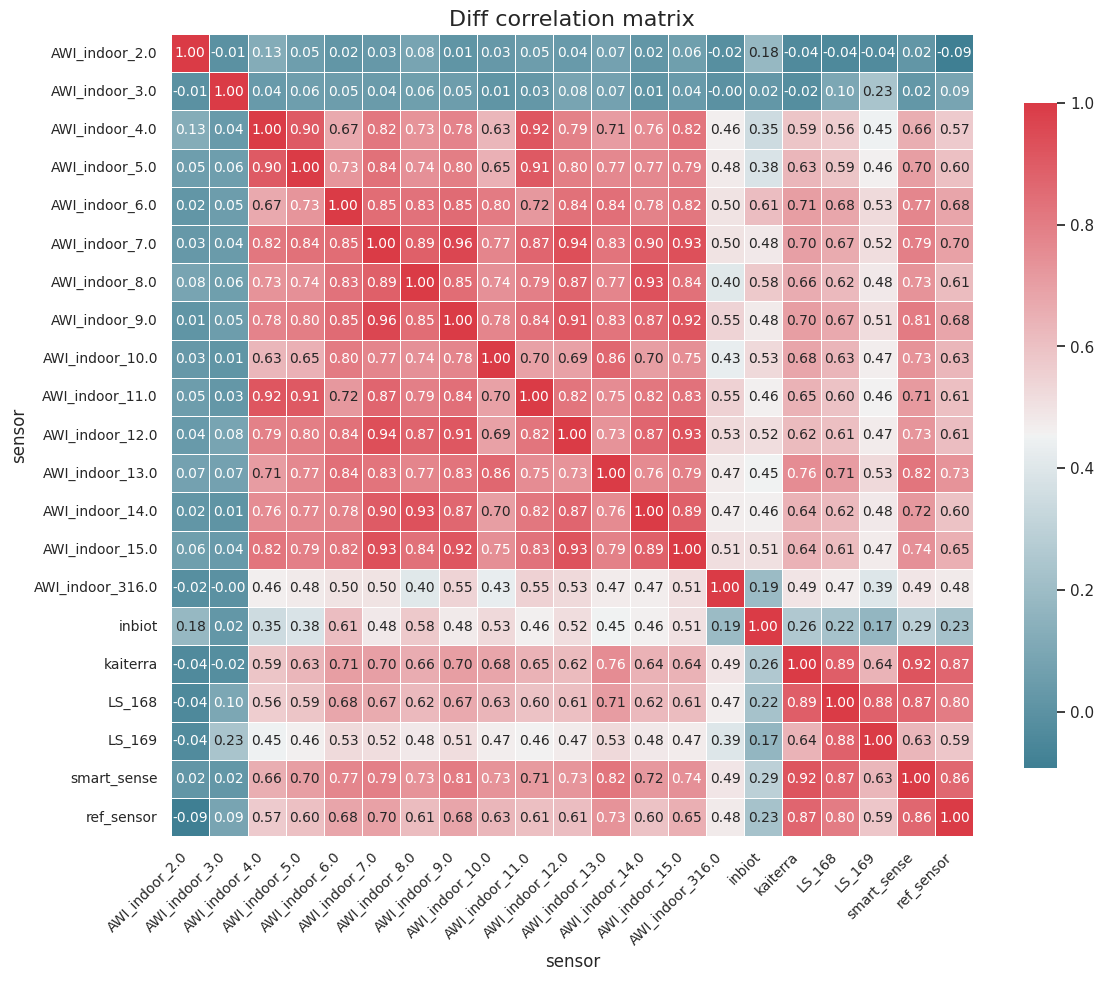

In [13]:
plot_correlation_matrix(df_diff_exp_data.corr(),title="Diff correlation matrix")